In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Import the requests library
import requests

In [7]:
#import the API key
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ee233a99722226a6b27c7cc4704e8b7c


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging purposes
    if(i % 50 ==0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set{set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set1 | rikitea
Processing Record 3 of Set1 | thunder bay
Processing Record 4 of Set1 | malindi
Processing Record 5 of Set1 | la paz
Processing Record 6 of Set1 | coihaique
Processing Record 7 of Set1 | port elizabeth
Processing Record 8 of Set1 | saint-pierre
Processing Record 9 of Set1 | lazaro cardenas
Processing Record 10 of Set1 | lebu
Processing Record 11 of Set1 | ushuaia
Processing Record 12 of Set1 | jamestown
Processing Record 13 of Set1 | punta arenas
Processing Record 14 of Set1 | castro
Processing Record 15 of Set1 | tucumcari
Processing Record 16 of Set1 | ribeira grande
Processing Record 17 of Set1 | si bun ruang
Processing Record 18 of Set1 | hithadhoo
Processing Record 19 of Set1 | gelemso
Processing Record 20 of Set1 | suntar
Processing Record 21 of Set1 | torbay
Processing Record 22 of Set1 | diego de almagro
Proces

Processing Record 42 of Set4 | arcata
Processing Record 43 of Set4 | okha
Processing Record 44 of Set4 | coahuayana
Processing Record 45 of Set4 | najran
Processing Record 46 of Set4 | kuntaur
Processing Record 47 of Set4 | khatanga
Processing Record 48 of Set4 | saint-joseph
Processing Record 49 of Set4 | salinopolis
Processing Record 50 of Set4 | deh rawud
City not found. Skipping...
Processing Record 1 of Set5 | chiang klang
Processing Record 2 of Set5 | vardo
Processing Record 3 of Set5 | los llanos de aridane
Processing Record 4 of Set5 | mahebourg
Processing Record 5 of Set5 | carauari
Processing Record 6 of Set5 | dustlik
Processing Record 7 of Set5 | sao joao da barra
Processing Record 8 of Set5 | raigarh
Processing Record 9 of Set5 | lorengau
Processing Record 10 of Set5 | mahajanga
Processing Record 11 of Set5 | aripuana
Processing Record 12 of Set5 | sitka
Processing Record 13 of Set5 | alexandria
Processing Record 14 of Set5 | provideniya
Processing Record 15 of Set5 | dwar

Processing Record 37 of Set8 | kiunga
Processing Record 38 of Set8 | ozernovskiy
Processing Record 39 of Set8 | constitucion
Processing Record 40 of Set8 | alofi
Processing Record 41 of Set8 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set8 | san andres
Processing Record 43 of Set8 | haines junction
Processing Record 44 of Set8 | grand-lahou
Processing Record 45 of Set8 | mega
Processing Record 46 of Set8 | honningsvag
Processing Record 47 of Set8 | swellendam
Processing Record 48 of Set8 | coaraci
Processing Record 49 of Set8 | kabelvag
Processing Record 50 of Set8 | nizwa
Processing Record 1 of Set9 | cap malheureux
Processing Record 2 of Set9 | jumla
Processing Record 3 of Set9 | shu
Processing Record 4 of Set9 | ugoofaaru
Processing Record 5 of Set9 | nikolskoye
Processing Record 6 of Set9 | nago
Processing Record 7 of Set9 | chokurdakh
Processing Record 8 of Set9 | riyadh
Processing Record 9 of Set9 | cozmesti
Processing Record 10 of Set9 | tara
Processing Recor

Processing Record 32 of Set12 | acajutla
Processing Record 33 of Set12 | paita
Processing Record 34 of Set12 | bambanglipuro
Processing Record 35 of Set12 | marawi
Processing Record 36 of Set12 | mrirt
City not found. Skipping...
Processing Record 37 of Set12 | seoul
Processing Record 38 of Set12 | teknaf
Processing Record 39 of Set12 | vsevolodo-vilva
City not found. Skipping...
Processing Record 40 of Set12 | hay river
Processing Record 41 of Set12 | chara
Processing Record 42 of Set12 | bafilo
Processing Record 43 of Set12 | berlevag
Processing Record 44 of Set12 | udachnyy
Processing Record 45 of Set12 | serenje
Processing Record 46 of Set12 | yalkhoy-mokhk
Processing Record 47 of Set12 | cairns
Processing Record 48 of Set12 | kattivakkam
Processing Record 49 of Set12 | tatarsk
Processing Record 50 of Set12 | arica
Processing Record 1 of Set13 | morros
Processing Record 2 of Set13 | moose factory
Processing Record 3 of Set13 | kumluca
Processing Record 4 of Set13 | edd
Processing R

In [11]:
len(city_data)

561

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,79.23,77,17,14.34,PF,2021-01-27 19:59:20
1,Thunder Bay,48.4001,-89.3168,5.00,60,20,9.22,CA,2021-01-27 19:55:47
2,Malindi,-3.2175,40.1191,77.22,86,0,13.22,KE,2021-01-27 19:59:21
3,La Paz,-16.5000,-68.1500,62.60,27,40,9.22,BO,2021-01-27 19:55:07
4,Coihaique,-45.5752,-72.0662,55.40,54,75,10.36,CL,2021-01-27 19:59:21
5,Port Elizabeth,-33.9180,25.5701,66.20,88,75,8.05,ZA,2021-01-27 19:59:21
6,Saint-Pierre,-21.3393,55.4781,78.80,69,0,4.61,RE,2021-01-27 19:59:22
7,Lazaro Cardenas,17.9583,-102.2000,81.55,64,33,8.23,MX,2021-01-27 19:59:22
8,Lebu,-37.6167,-73.6500,61.23,68,100,10.96,CL,2021-01-27 19:59:22
9,Ushuaia,-54.8000,-68.3000,44.60,70,75,17.27,AR,2021-01-27 19:58:32


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-01-27 19:59:20,-23.1203,-134.9692,79.23,77,17,14.34
1,Thunder Bay,CA,2021-01-27 19:55:47,48.4001,-89.3168,5.00,60,20,9.22
2,Malindi,KE,2021-01-27 19:59:21,-3.2175,40.1191,77.22,86,0,13.22
3,La Paz,BO,2021-01-27 19:55:07,-16.5000,-68.1500,62.60,27,40,9.22
4,Coihaique,CL,2021-01-27 19:59:21,-45.5752,-72.0662,55.40,54,75,10.36
...,...,...,...,...,...,...,...,...,...
556,Moose Factory,CA,2021-01-27 20:02:01,51.2585,-80.6094,3.20,78,90,11.50
557,Kumluca,TR,2021-01-27 20:02:02,36.3703,30.2869,48.58,58,0,15.46
558,Edd,ER,2021-01-27 20:02:02,13.9297,41.6925,77.38,43,0,22.66
559,Muswellbrook,AU,2021-01-27 20:02:02,-32.2667,150.9000,69.01,82,100,4.00


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import time module
import time

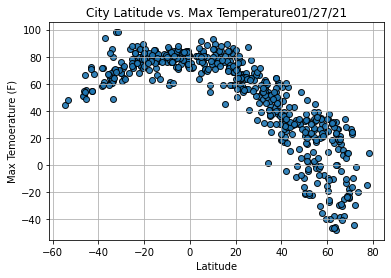

In [19]:
# Build the scatter plot for latitude vs max temp
plt.scatter(lats, 
           max_temps, 
           edgecolor ="black", linewidths=1, marker="o", 
           alpha=0.9, label ="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature"+ time.strftime("%x"))
plt.ylabel("Max Temoerature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

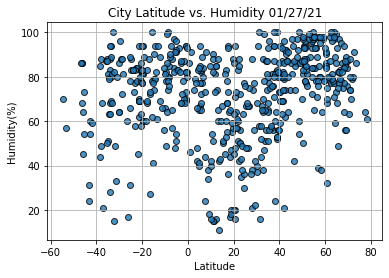

In [22]:
# Build the scatter plot for latitude vs max temp
plt.scatter(lats, 
           humidity, 
           edgecolor ="black", linewidths=1, marker="o", 
           alpha=0.8, label ="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

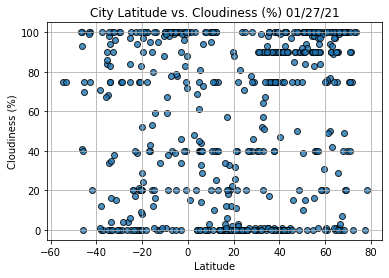

In [23]:
# Build the scatter plot for latitude vs max temp
plt.scatter(lats, 
           cloudiness, 
           edgecolor ="black", linewidths=1, marker="o", 
           alpha=0.8, label ="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()